# Bubble and Dew Point for Multicomponent Mixtures

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE20255](https://github.com/jckantor/CBE20255). 

### Summary

This [Jupyter notebook](http://jupyter.org/notebook.html) illustrates the use of Raoult's Law and Antoine's equation to compute the bubble and dew points for an ideal solution. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

## Bubble and Dew Point Equations for Ideal Mixtures

Initialize the IPython workspace with with default settings for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

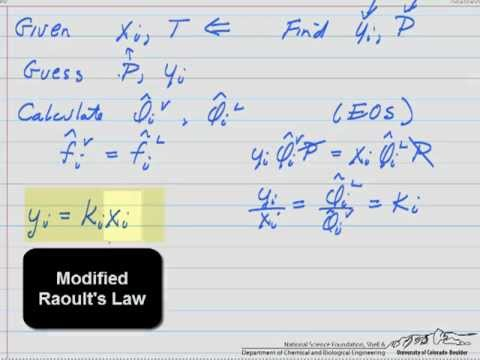

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('theq1Go858E') 

Bubble and dew point calculations for ideal mixtures are all about solving a fixed set of equations. If we have $N$ chemical species, and refer to the liquid phase mole fractions as $x_1, \ldots, x_N$ and the vapor phase mole fractions as $y_1, \ldots, y_N$, then two of these equations are

$$x_1 + x_2 + \cdots + x_N = 1$$

and

$$y_1 + y_2 + \cdots + y_N = 1$$

The remaining equations come from Raoult's law. For each of the $n = 1, 2, \ldots, N$ species we have an equation

$$ y_n P = x_n P_n^{sat}(T)$$

where $P_n^{sat}(T)$ is determined from experimental data or from a correlation such as Antoine's equation. This gives us a total $N+2$ equations. 

The unknown variables are the $N$ values of $x_n$, the $N$ values of $y_n$, plus temperature $T$ and pressure $P$ -- a total $2N + 2$ variables. With this as context, we can identify two types of problems.

#### Bubble Point Equations

If the composition of the liquid phase is known, then the equilibrium equations can be solved for the unknown vapor phase composition

$$y_n = x_n \frac{P_n^{sat}(T)}{P}$$

Substituting these values into the equation $y_1 + y_2 + \cdots + y_N = 1$ gives an equation.

$$ x_1\frac{P_1^{sat}(T)}{P} + \cdots + x_N \frac{P_N^{sat}(T)}{P} - 1 = 0$$

If $P$ is known, then the equilibrium value of $T$ is a root to this equation that can be found using standard root-finding functions in the Python or Matlab libraries.

If $T$ is known, the solution for $P$ is simply

$$ P = x_1 P_1^{sat}(T) + x_2 P_2^{sat}(T) + \cdots + x_N P_N^{sat}(T)$$

Once both $T$ and $P$ are known, the vapor phase composition can be computed by substituting those values back into the first equation.

#### Dew Point Equations

If the composition of the vapor phase is known, then the equilibrium equations can be solved for the unknown vapor liquid phase composition

$$x_n = y_n \frac{P}{P_n^{sat}(T)}$$

Substituting these values into the equation $x_1 + x_2 + \cdots + x_N = 1$ gives an equation

$$ y_1\frac{P}{P_1^{sat}(T)} + \cdots + y_N \frac{P}{P_N^{sat}(T)} - 1 = 0$$

If $P$ is known, then the equilibrium value of $T$ is a root to this equation that can be found using standard root-finding functions in the Python or Matlab libraries.

If $T$ is known, the solution for $P$ is 

$$\frac{1}{P} = \frac{y_1}{P_1^{sat}(T)} + \frac{y_2}{P_2^{sat}(T)} + \cdots + \frac{y_N}{P_N^{sat}(T)}$$

Once both $T$ and $P$ are known, the liquid phase composition can be computed by substituting those values back into the first equation.

## Multicomponent Mixtures

In [3]:
Psat = dict()
Psat['acetone'] = lambda T: 10**(7.02447 - 1161.0/(224 + T))
Psat['benzene'] = lambda T: 10**(6.89272 - 1203.531/(219.888 + T))
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(222.65 + T))
Psat['toluene'] = lambda T: 10**(6.95805 - 1346.773/(219.693 + T))

For the multicomponent case we will use Python dictionaries to store compositions of the liquid phases. Bubble point functions.

Here we use the `fsolve` function from the scipy.optimize library to return the root of this equation. Note that `fsolve` returns a list of roots, so the terminal `[0]` on the expression selects the first root (and presumably only) of the bubble point equation.

In [4]:
from scipy.optimize import fsolve
def Tbub(species,x):
    return fsolve(lambda T : sum([x[s]*Psat[s](T)/P for s in species]) - 1.0,60)[0]

def ybub(species,x):
    return {s: x[s]*Psat[s](Tbub(species,x))/P for s in species}

Dew point functions

In [5]:
def Tdew(species,y):
    return fsolve(lambda T : sum([y[s]*P/Psat[s](T) for s in species]) - 1.0,60)[0]

def xdew(species,y):
    return {s: y[s]*P/Psat[s](Tdew(species,y)) for s in species}

Demonstration

In [6]:
species = ['acetone','benzene','toluene']
z = dict()

P = 0.8*760
z['acetone'] = 0.1
z['benzene'] = 0.3
z['toluene'] = 0.6

print("\nBubble Point Calculations")

x = z
T = Tbub(species,x)
y = ybub(species,x)

print("Temperature = {:5.2f} [deg C]".format(T))
print("Pressure  = {:7.2f} [mmHg]".format(P))
print("  Composition    x[s]   y[s]")
for s in species:
    print("    {:10s} {:6.3f} {:6.3f}".format(s,x[s],y[s]))

print("\nDew Point Calculations")

y = z
T = Tdew(species,y)
x = xdew(species,y)

print("Temperature = {:5.2f} [deg C]".format(T))
print("Pressure  = {:7.2f} [mmHg]".format(P))
print("  Composition    x[s]   y[s]")
for s in species:
    print("    {:10s} {:6.3f} {:6.3f}".format(s,x[s],y[s]))



Bubble Point Calculations
Temperature = 82.50 [deg C]
Pressure  =  608.00 [mmHg]
  Composition    x[s]   y[s]
    acetone     0.100  0.284
    benzene     0.300  0.403
    toluene     0.600  0.313

Dew Point Calculations
Temperature = 93.17 [deg C]
Pressure  =  608.00 [mmHg]
  Composition    x[s]   y[s]
    acetone     0.026  0.100
    benzene     0.163  0.300
    toluene     0.810  0.600
